# L3: Large Multimodal Models (LMMs)

* In this classroom, the libraries have been already installed for you.
* If you would like to run this code on your own machine, you need to install the following:
```
    !pip install google-generativeai

```

Note: don't forget to set up your GOOGLE_API_KEY to use the Gemini Vision model in the env file.
```
   %env GOOGLE_API_KEY=************
```
Check the [documentation](https://ai.google.dev/gemini-api/docs/api-key) for more infomation.

In [1]:
import warnings

warnings.filterwarnings("ignore")

## Setup

### Load environment variables and API keys

In [2]:
import os
from dotenv import find_dotenv, load_dotenv

# read local .env file
_ = load_dotenv(find_dotenv())
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

In [3]:
# Set the genai library

import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
    api_key=GOOGLE_API_KEY,
    # transport="rest",
    # client_options=ClientOptions(
    #     api_endpoint=os.getenv("GOOGLE_API_BASE")
    # )
)

In [4]:
# Added by KA for sanity check
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")
print(response.text)

## Understanding the Magic Behind AI: A Simplified Breakdown

Artificial Intelligence (AI) isn't a single thing, but a collection of technologies that allow computers to perform tasks that typically require human intelligence. Here's a simplified explanation of how it works:

**1. Data is King:** AI thrives on data. It learns by analyzing massive amounts of information, identifying patterns and relationships within it. This data can be anything from text and images to sensor readings and financial records.

**2. Algorithms are the Brains:**  These are sets of instructions that tell computers how to process and analyze the data. There are various types of algorithms, each designed for specific tasks like:

* **Machine Learning:**  Allows computers to learn from data without being explicitly programmed. It includes:
    * **Supervised learning:** Trains algorithms on labeled data (e.g., identifying images of cats and dogs by providing labeled examples).
    * **Unsupervised learning:**  

> Note: learn more about [GOOGLE_API_KEY](https://ai.google.dev/) to run it locally.

## Helper functions

In [5]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _:True))

- Function to call LMM (Large Multimodal Model)

In [6]:
def call_lmm(image_path: str, prompt: str) -> str:
    # Load the image
    img = PIL.Image.open(image_path)

    # Call generative model
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    return to_markdown(response.text)

## Analyze images with an LMM

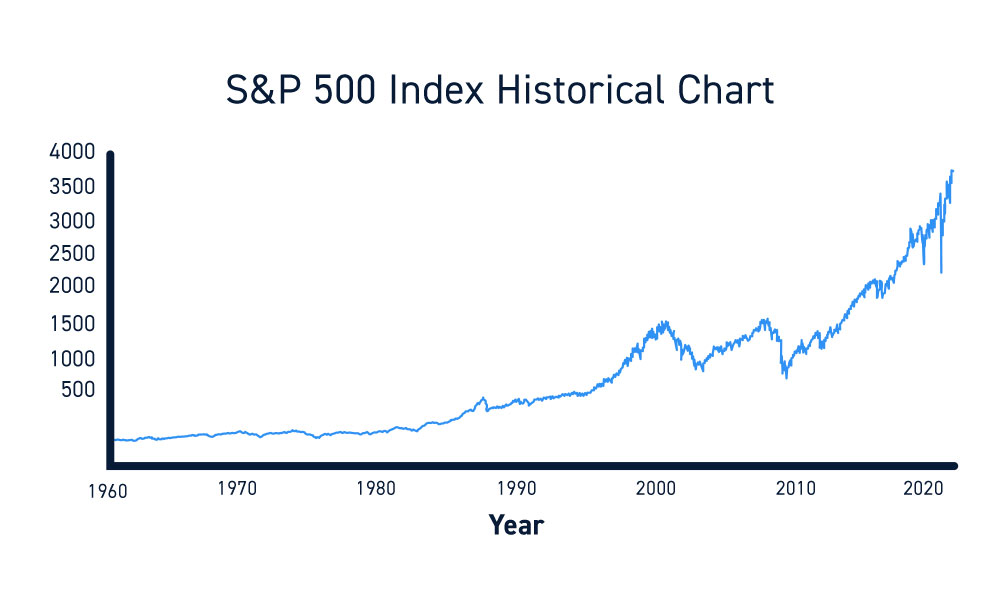

In [7]:
# Pass in an image and see if the LMM can answer questions about it
sp_500_img = "./data/L3/SP-500-Index-Historical-Chart.jpg"
Image(data=sp_500_img)

In [8]:
# Use the LMM function
call_lmm(sp_500_img, prompt="Explain what you see in this image.")

> The image shows a line graph titled "S&P 500 Index Historical Chart".  The graph shows the performance of the S&P 500 stock market index from 1960 to 2020.  The x-axis is labeled "Year" and the y-axis shows the index value, ranging from 0 to 4000. The graph shows that the S&P 500 has generally increased in value over time, with some fluctuations along the way.

## Analyze a harder image

* Try something harder: Here's a figure we explained previously!

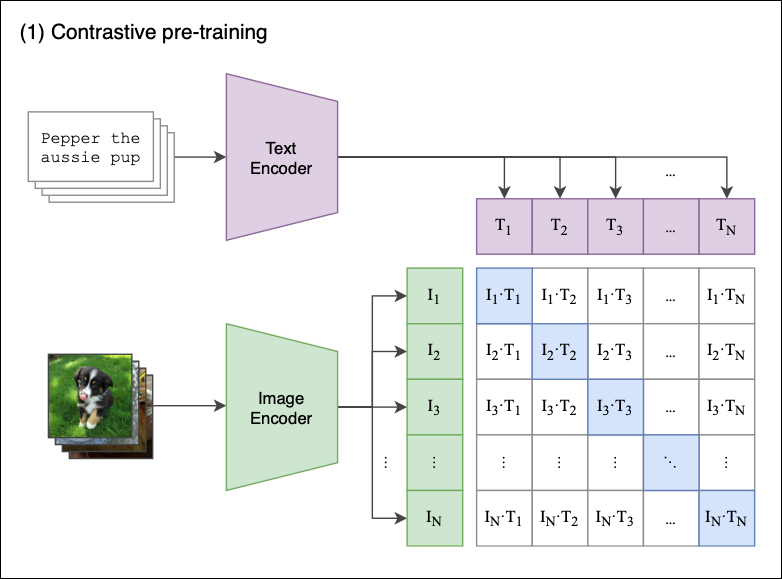

In [9]:
clip_img = "./data/L3/clip.png"
Image(clip_img)

In [10]:
call_lmm(clip_img, prompt="Explain what this figure is and where is this used.")

> The figure illustrates a contrastive pre-training scheme for image and text representations. It works by learning representations that are similar for image-text pairs that are semantically related and dissimilar for pairs that are not.
> 
> The process is as follows:
> 
> 1. **Input:** The model takes as input a set of images (I1, I2, ... IN) and a set of text descriptions (T1, T2, ... TN).
> 
> 2. **Encoding:** Both images and texts are passed through separate encoders:
>     - **Image Encoder:**  Encodes each image into a vector representation.
>     - **Text Encoder:** Encodes each text description into a vector representation.
> 
> 3. **Similarity Matrix:** The encoded image and text representations are used to create a similarity matrix. This matrix represents the similarity between each image representation and each text representation. For example, I1:T1 represents the similarity between the representation of image I1 and the representation of text T1.
> 
> 4. **Contrastive Loss:** The model uses a contrastive loss function to learn the relationships between image-text pairs. The loss function aims to:
>     - **Maximize** the similarity between representations of image-text pairs that are semantically related (e.g., an image of a dog and the text "a dog").
>     - **Minimize** the similarity between representations of image-text pairs that are not semantically related (e.g., an image of a dog and the text "a car").
> 
> **Use Cases:**
> 
> This pre-training scheme is commonly used in:
> 
> - **Image-Text Retrieval:** Finding images based on text queries or vice versa.
> - **Multimodal Understanding:** Building systems that can understand and reason about both images and text.
> - **Image Captioning:** Generating text descriptions for images.
> - **Visual Question Answering:** Answering questions about images.
> 
> **Overall:** This method helps learn representations that capture the underlying semantic relationships between images and text, enabling more effective downstream applications.


## Decode the hidden message

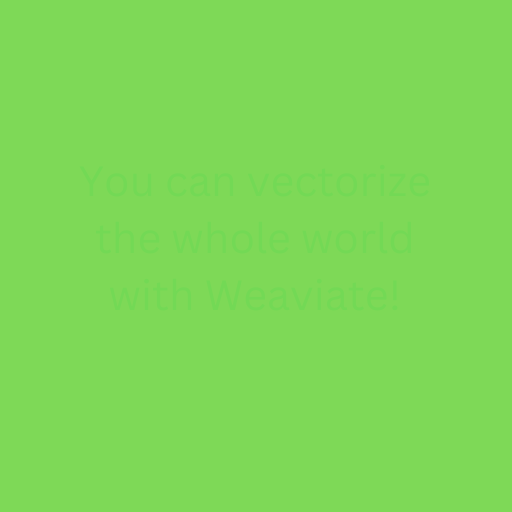

In [11]:
blank_img = "./data/L3/blankimage3.png"
Image(blank_img)

In [12]:
# Ask to find the hidden message
call_lmm(blank_img, prompt="Read what you see on this image.")

> You can vectorize the whole world with Weaviate!

## How the model sees the picture!

> You have to be careful! The model does not "see" in the same way that we see!

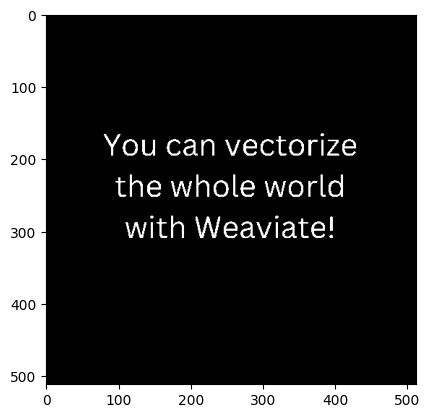

In [13]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

image = imageio.imread(blank_img)

# Convert the image to a numpy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0] > 120, 0, 1), cmap="gray")

### Try it yourself!

**EXTRA!**  You can use the function below to create your own hidden message, into an image:

In [14]:
# Create a hidden text in an image
def create_image_with_text(text, font_size=20, font_family="sans-serif", text_color="#73D955", background_color="#7ED957"):
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor(background_color)
    ax.text(0.5, 0.5, text, fontsize=font_size, ha='center', va='center', color=text_color, fontfamily=font_family)
    ax.axis("off")
    plt.tight_layout()

    return fig

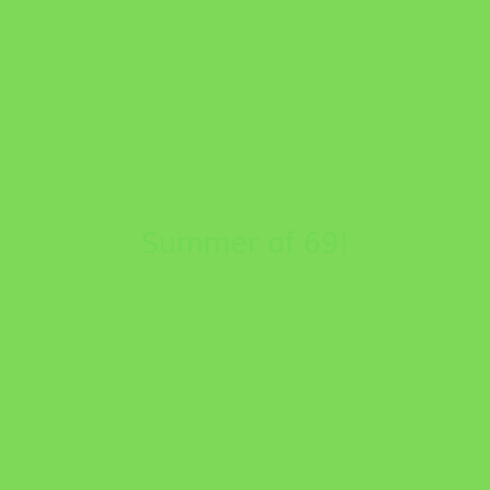

In [15]:
# Modify the text here to create a new hidden message image!
fig = create_image_with_text(text="Summer of 69!")

# Plot the image with the hidden message
plt.show()
extra_output_image = "./data/L3/extra_output_image.png"
fig.savefig(extra_output_image)


In [17]:
# Call the LMM function with the image just generated
call_lmm(extra_output_image, prompt="Read what you see on this image.")

> The image is a solid green background with the text "Summer of 69!" written in a light grey color in the middle of the image. The text is slightly faded.

* It worked!, now plot the image decoding the message.

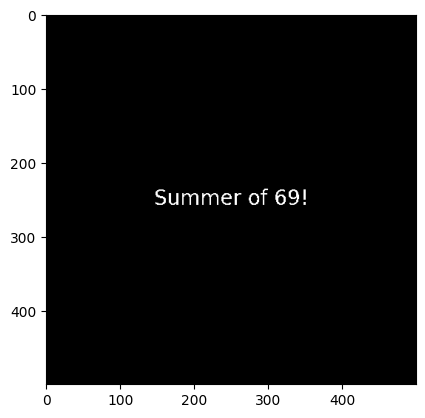

In [18]:
image = imageio.imread(extra_output_image)

# Convert the image to a Numpy array
image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0] > 120, 0, 1), cmap="gray")
